In [1]:
import deconomix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading single cell reference data
sc_references = pd.read_csv("../Data/sc_references_top2000.csv", index_col=0)
print("sc_references shape:", sc_references.shape)

sc_references shape: (1548, 12315)


In [3]:
# Remove the auto-added .nb suffix from every column label
sc_references.columns = (
    sc_references.columns
        .str.replace(r"\.\d+$", "", regex=True)   # drop .1 .2 …
        .str.strip()                              # tidy whitespace
)

In [4]:
sc_references.head()

,epithelial cell,epithelial cell,epithelial cell,epithelial cell,epithelial cell,epithelial cell,epithelial cell,epithelial cell,epithelial cell,epithelial cell,...,T cell,T cell,T cell,T cell,T cell,T cell,T cell,T cell,T cell,T cell
IGHA1,0.5,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,1.0,0.00,...,0.0,0.0,0.0,0.0,1.0,1.0,1.000000,0.0,0.0,0.000000
VIM-AS1,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.00,...,4.0,1.0,9.0,0.0,39.0,7.0,1.000000,8.0,2.0,5.000000
MT-CO1,13.0,40.0,27.0,19.019222,38.28923,54.0,25.0,29.0,12.0,15.00,...,13.0,18.0,5.0,18.0,6.0,22.0,35.000000,13.0,97.0,31.295238
IGHA2,0.5,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000
IGLL5,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.25,...,0.0,1.0,0.0,0.0,0.0,0.0,0.624851,0.0,1.0,0.000000


In [5]:
X_ref, Y_mat, C_mat = deconomix.utils.simulate_data(scRNA_df= sc_references, n_mixtures = 1000, n_cells_in_mix = 100, n_genes= 1548, seed= 42)
display(X_ref)
display(Y_mat)
display(C_mat)

,B cell,T cell,endothelial cell,epithelial cell,mesenchymal cell,myeloid cell,plasma cell
IGHA1,1.451410,0.762264,0.459002,1.428308,0.496908,1.762413,80.399941
VIM-AS1,4.914935,9.950519,48.435668,0.099430,47.360125,21.215016,22.083842
MT-CO1,16.275935,15.627645,17.350895,65.792146,20.094945,24.946896,30.380011
IGHA2,0.982316,0.453233,0.322484,0.651941,0.369585,0.915811,44.077494
IGLL5,0.251330,0.117687,0.117141,0.227632,0.100532,0.239265,32.527456
...,...,...,...,...,...,...,...
PKM,0.159428,0.142143,0.069892,0.088960,0.121870,0.212121,0.090941
LIMD2,0.132468,0.104527,0.032607,0.004236,0.012425,0.075349,0.026933
CPAMD8,0.001300,0.000033,0.131720,0.000852,0.001669,0.000000,0.005829
ITGAV,0.019506,0.018105,0.129136,0.026566,0.116941,0.055672,0.013025


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
IGHA1,10.912733,31.255044,15.254418,6.788590,8.604297,8.613355,8.944268,7.226252,9.207906,14.803534,...,5.999247,3.401655,9.809571,12.436874,4.769621,4.710958,11.240250,3.825857,9.588829,9.004290
VIM-AS1,9.159912,6.770034,8.449993,5.760000,10.178699,9.074266,6.728813,9.619231,7.520117,5.055092,...,9.485217,5.950000,5.217997,15.562530,7.079497,10.631329,6.570000,7.999027,7.312487,8.700744
MT-CO1,40.361459,56.399902,47.301317,45.064078,46.745139,44.231375,45.989013,40.658185,54.492927,48.705621,...,49.916178,52.098143,42.960114,44.421049,59.401674,54.306127,49.232470,45.572560,48.404869,34.847610
IGHA2,10.413149,1.255514,5.995371,1.152415,13.800163,1.469905,3.367120,2.452179,9.010789,8.512460,...,4.629136,1.827893,11.547323,2.423104,7.997832,2.206340,1.346211,2.377064,1.618854,4.247514
IGLL5,7.088383,0.724266,0.437732,4.504394,1.685721,4.006399,4.605687,1.322997,2.111320,2.620915,...,0.296559,0.237516,2.497993,7.136520,0.374526,4.650444,0.513637,0.872763,6.041662,17.380535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PKM,0.120000,0.120000,0.160000,0.090000,0.080000,0.120000,0.100000,0.080000,0.115000,0.090000,...,0.110000,0.120000,0.140000,0.110000,0.080000,0.100105,0.090000,0.090000,0.100000,0.160000
LIMD2,0.050739,0.006000,0.025000,0.016000,0.048333,0.020000,0.055000,0.010000,0.010000,0.022000,...,0.005000,0.035000,0.021000,0.022000,0.100000,0.020000,0.073883,0.025000,0.010000,0.029560
CPAMD8,0.000000,0.000000,0.050000,0.040000,0.040000,0.000000,0.030000,0.020000,0.020000,0.000000,...,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ITGAV,0.000000,0.060000,0.070000,0.030000,0.020000,0.020000,0.060211,0.080476,0.040000,0.020000,...,0.030000,0.010000,0.020023,0.110000,0.020000,0.070000,0.010000,0.030000,0.070000,0.020000


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
B cell,0.05,0.06,0.03,0.05,0.03,0.08,0.03,0.06,0.12,0.09,...,0.08,0.10,0.06,0.06,0.09,0.06,0.07,0.05,0.04,0.07
T cell,0.19,0.12,0.18,0.15,0.13,0.20,0.18,0.13,0.09,0.11,...,0.11,0.12,0.13,0.18,0.06,0.14,0.12,0.14,0.20,0.15
endothelial cell,0.03,0.03,0.03,0.03,0.02,0.03,0.02,0.06,0.02,0.01,...,0.02,0.04,0.03,0.03,0.03,0.03,0.02,0.03,0.04,0.03
epithelial cell,0.53,0.59,0.62,0.61,0.65,0.51,0.61,0.58,0.58,0.66,...,0.60,0.66,0.65,0.54,0.66,0.59,0.62,0.63,0.59,0.58
mesenchymal cell,0.04,0.05,0.04,0.04,0.05,0.04,0.03,0.06,0.03,0.02,...,0.07,0.04,0.05,0.07,0.04,0.09,0.04,0.03,0.01,0.03
myeloid cell,0.02,0.03,0.00,0.02,0.00,0.03,0.01,0.01,0.01,0.00,...,0.02,0.00,0.01,0.03,0.01,0.02,0.01,0.02,0.04,0.02
plasma cell,0.14,0.12,0.10,0.10,0.12,0.11,0.12,0.10,0.15,0.11,...,0.10,0.04,0.07,0.09,0.11,0.07,0.12,0.10,0.08,0.12


### DTD

In [6]:
# 1)  Align gene order so X_ref.index == Y_mat.index
common_genes = X_ref.index.intersection(Y_mat.index)

X_ref = X_ref.loc[common_genes]
Y_mat = Y_mat.loc[common_genes]

# 2)  Align cell-type order so X_ref.columns == C_mat.index
missing_types = [ct for ct in X_ref.columns if ct not in C_mat.index]
if missing_types:
    raise ValueError(f"Missing in C_mat: {missing_types}")

C_mat = C_mat.loc[X_ref.columns]       # reorder & drop extras

# 3)  Train the DTD model
model0 = deconomix.methods.DTD(X_ref, Y_mat, C_mat)
model0.run(iterations = 500)

  0%|          | 0/500 [00:00<?, ?it/s]

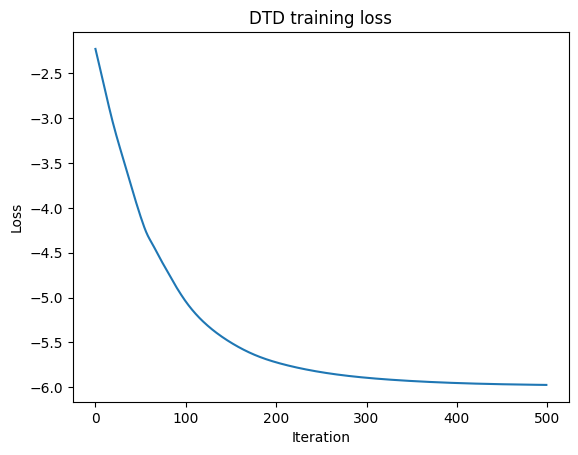

In [7]:
plt.plot(model0.losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("DTD training loss")
plt.show()

In [8]:
model0.gamma

,gene weights
IGHA1,9.484239e-05
VIM-AS1,7.116380e-04
MT-CO1,1.083148e-26
IGHA2,1.380295e-22
IGLL5,2.741115e-20
...,...
PKM,1.703195e-20
LIMD2,3.705678e-05
CPAMD8,1.095599e+01
ITGAV,5.850856e+00


In [9]:
C_est_train = deconomix.utils.calculate_estimated_composition(X_ref, Y_mat, model0.gamma)
display(C_est_train)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
B cell,0.025010,0.069270,0.001527,0.036167,0.043296,0.084891,0.002131,0.052006,0.163402,0.092809,...,0.073266,0.097918,0.053457,0.067598,0.098447,0.062929,0.061150,0.033477,0.018770,0.072447
T cell,0.236449,0.109441,0.185021,0.179539,0.149135,0.224112,0.172185,0.115586,0.082587,0.090789,...,0.122854,0.107830,0.158045,0.171902,0.051110,0.152707,0.104669,0.131345,0.179985,0.126035
endothelial cell,0.046539,0.021284,0.029339,0.026519,0.026410,0.014192,0.020892,0.051043,0.027316,0.006368,...,0.019656,0.039483,0.022242,0.027983,0.020526,0.027371,0.024482,0.020167,0.029097,0.028358
epithelial cell,0.490573,0.633313,0.642790,0.532342,0.664315,0.510080,0.615108,0.581635,0.621724,0.615325,...,0.648602,0.616352,0.630468,0.543035,0.731135,0.618619,0.651128,0.611819,0.550347,0.562003
mesenchymal cell,0.027950,0.052304,0.037433,0.038590,0.051211,0.029258,0.035594,0.050115,0.034292,0.007744,...,0.081327,0.043849,0.077756,0.111796,0.044727,0.092773,0.029395,0.035597,0.011418,0.036263
myeloid cell,0.010413,0.012754,0.000290,0.012960,0.000000,0.035272,0.030024,0.010157,0.005332,0.000000,...,0.034824,0.022286,0.007366,0.030463,0.014715,0.004302,0.009423,0.022452,0.044266,0.019871
plasma cell,0.147864,0.109772,0.107088,0.117965,0.115400,0.128272,0.127796,0.093759,0.145954,0.115598,...,0.074405,0.020479,0.085444,0.125271,0.097514,0.072926,0.129671,0.099719,0.081043,0.118359


### Validation


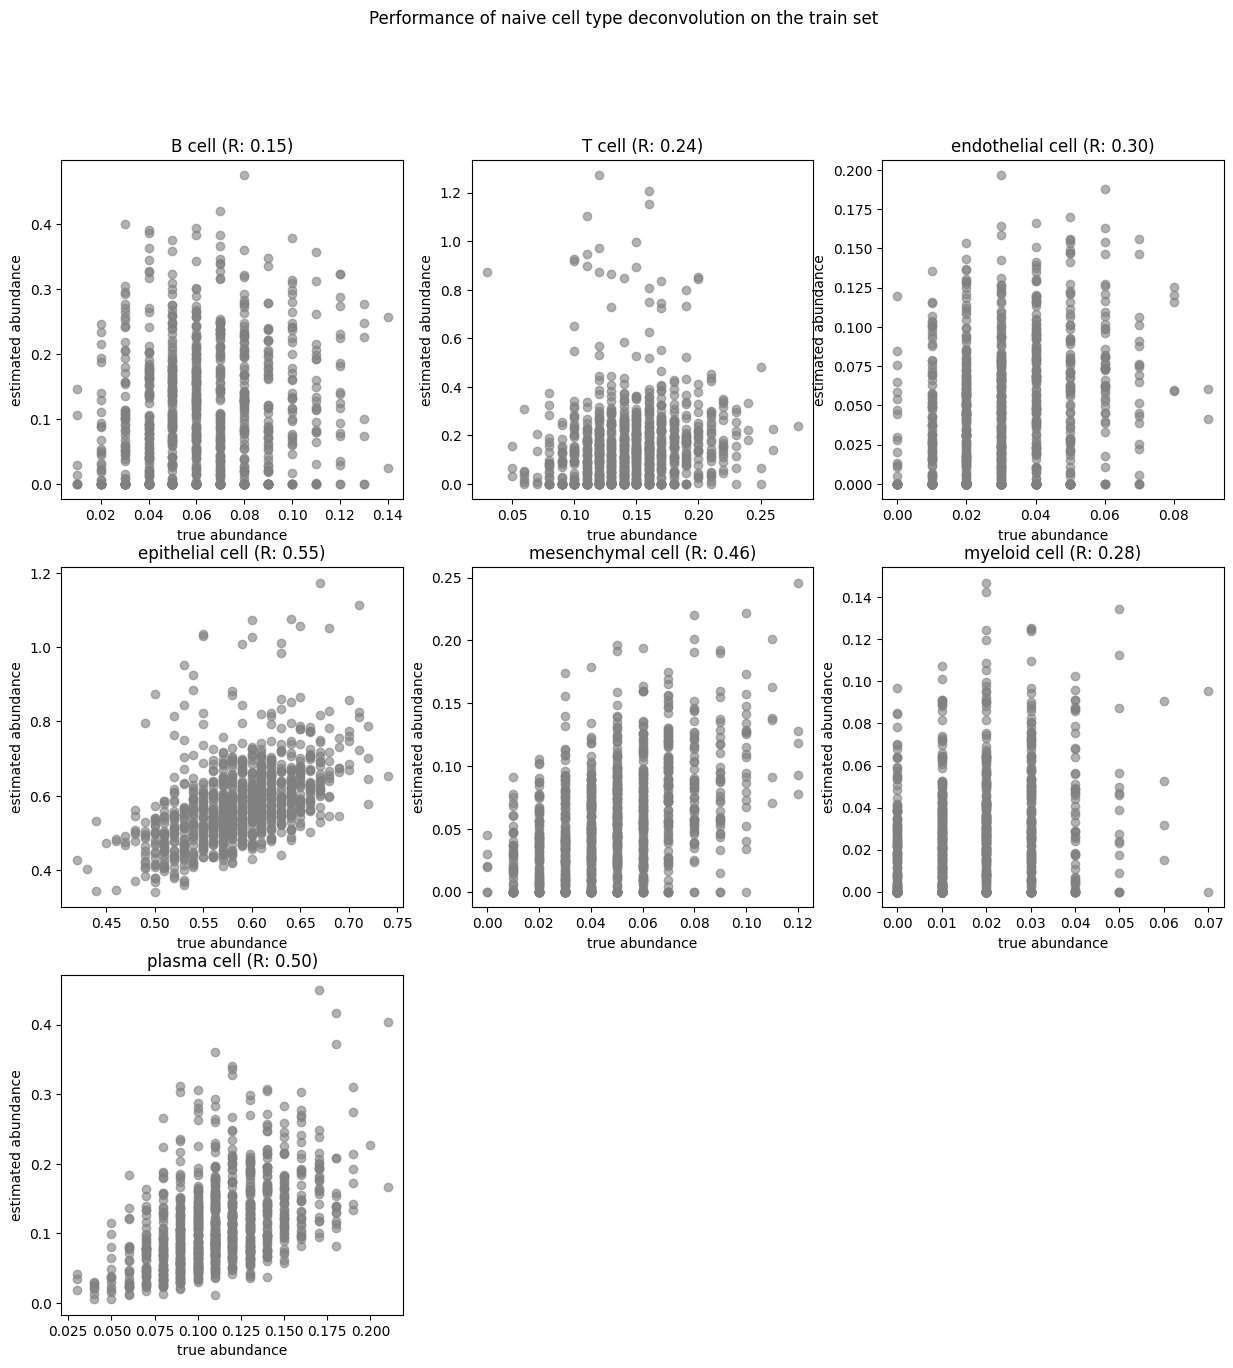

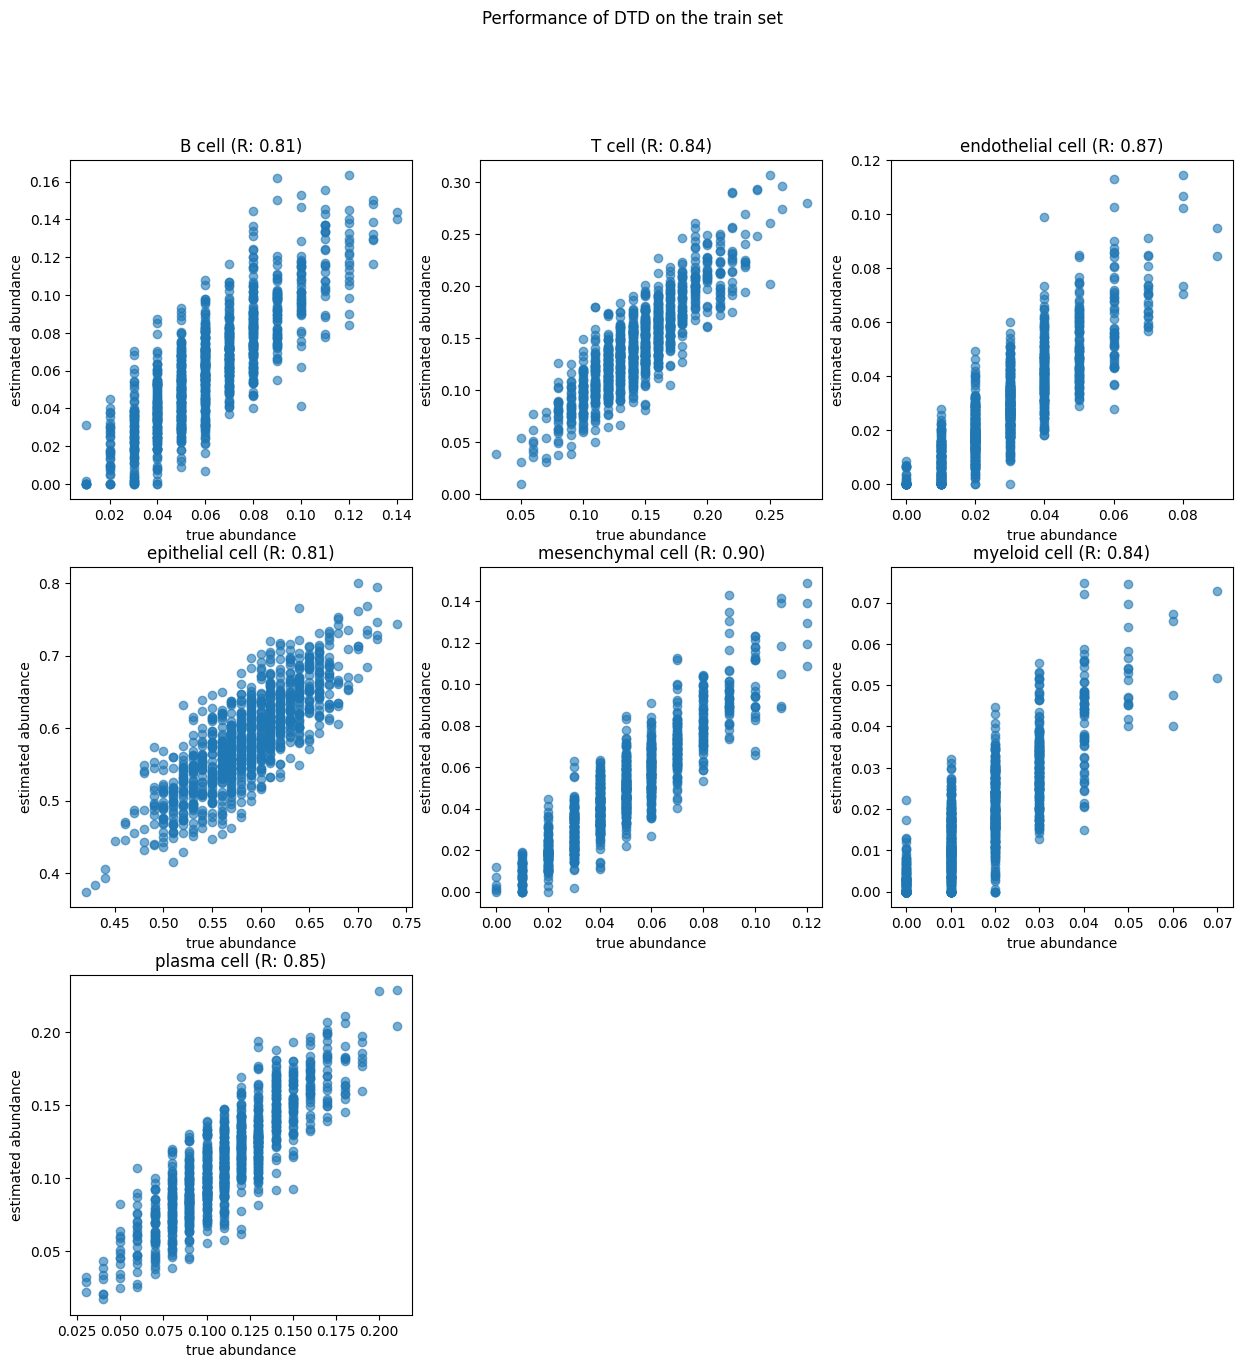

In [10]:
gamma_naive = pd.Series(np.ones((1548)))
gamma_naive.index = model0.gamma.index
C_est_train_naive = deconomix.utils.calculate_estimated_composition(X_ref, Y_mat, gamma_naive)  
corr_train_naive = deconomix.utils.plot_corr(C_mat, C_est_train_naive, title="Performance of naive cell type deconvolution on the train set")
corr_train = deconomix.utils.plot_corr(C_mat, C_est_train, title="Performance of DTD on the train set", color="C0")

In [11]:
import scanpy as sc

adata_st = sc.read_h5ad("../Data/STDS0000002/adata_processed.h5ad")

/Users/bilalkachir/Desktop/Internship/.venv/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [12]:
adata_st.obs_names_make_unique()

In [13]:
# 1)  Keep only the 1 596 genes present in X_ref,
#     and ensure the SAME order
genes_final = X_ref.index            # 1548-gene index
adata_st.var_names_make_unique()     # safety: no dupes
missing = genes_final.difference(adata_st.var_names)

if len(missing):
    raise ValueError(f"{len(missing)} reference genes missing in ST data")

In [14]:
# Subset and reorder
adata_st_sub = adata_st[:, genes_final].copy()
adata_st_sub = adata_st_sub[:, genes_final]   # enforce order

In [15]:
# 2) Build Y matrix  (genes × spots)  in the SAME orientation as X_ref
mat = adata_st_sub.X
mat = mat.toarray() if hasattr(mat, "toarray") else mat
adata_st = pd.DataFrame(
    mat.T,                          #  <<<  transpose here
    index=genes_final,              # 1548 genes  (rows)
    columns=adata_st_sub.obs_names  # 39 936 spots (columns)
)

In [16]:
# 3)  Pull gamma vector from the trained model
gamma_vec = model0.gamma.loc[genes_final] 

In [17]:
# keep only genes present in *both* and put them in identical order
common_genes = X_ref.index.intersection(adata_st.index)

X_ref = X_ref.loc[common_genes]      # genes × cell-types
Y_test = adata_st.loc[common_genes]    # genes × mixtures

assert X_ref.index.equals(Y_test.index)

In [18]:
C_est_test = deconomix.utils.calculate_estimated_composition(X_ref, Y_test, gamma_vec)
C_est_test_naive = deconomix.utils.calculate_estimated_composition(X_ref, Y_test, gamma_naive)

In [19]:
Y_test

,AAACAACGAATAGTTC-1,AAACAAGTATCTCCCA-1,AAACAATCTACTAGCA-1,AAACACCAATAACTGC-1,AAACAGAGCGACTCCT-1,AAACAGCTTTCAGAAG-1,AAACAGGGTCTATATT-1,AAACAGTGTTCCTGGG-1,AAACATGGTGAGAGGA-1,AAACATTTCCCGGATT-1,...,TTGTTAGCAAATTCGA-1-7,TTGTTCAGTGTGCTAC-1-7,TTGTTCTAGATACGCT-1-7,TTGTTGGCAATGACTG-1-7,TTGTTGTGTGTCAAGA-1-7,TTGTTTCACATCCAGG-1-7,TTGTTTCATTAGTCTA-1-7,TTGTTTCCATACAACT-1-7,TTGTTTGTATTACACG-1-7,TTGTTTGTGTAAATTC-1-7
IGHA1,0.0,4.0,0.0,0.0,5.0,2.0,2.0,1.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VIM-AS1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MT-CO1,6.0,40.0,0.0,60.0,14.0,10.0,32.0,10.0,27.0,45.0,...,3.0,2.0,1.0,0.0,16.0,1.0,1.0,2.0,1.0,4.0
IGHA2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IGLL5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PKM,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
LIMD2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CPAMD8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ITGAV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
C_est_test

,AAACAACGAATAGTTC-1,AAACAAGTATCTCCCA-1,AAACAATCTACTAGCA-1,AAACACCAATAACTGC-1,AAACAGAGCGACTCCT-1,AAACAGCTTTCAGAAG-1,AAACAGGGTCTATATT-1,AAACAGTGTTCCTGGG-1,AAACATGGTGAGAGGA-1,AAACATTTCCCGGATT-1,...,TTGTTAGCAAATTCGA-1-7,TTGTTCAGTGTGCTAC-1-7,TTGTTCTAGATACGCT-1-7,TTGTTGGCAATGACTG-1-7,TTGTTGTGTGTCAAGA-1-7,TTGTTTCACATCCAGG-1-7,TTGTTTCATTAGTCTA-1-7,TTGTTTCCATACAACT-1-7,TTGTTTGTATTACACG-1-7,TTGTTTGTGTAAATTC-1-7
B cell,0.000000,0.627473,0.000000,0.000000,0.195814,0.000000,0.000000,0.024707,0.115122,2.441404,...,0.044845,0.012084,0.037380,0.005224,0.077851,0.000000,0.000000,0.084285,0.011794,0.514036
T cell,0.097067,0.000000,0.023095,0.006242,0.000000,0.000000,0.111983,0.000000,0.000000,0.000000,...,0.008276,0.000000,0.000000,0.007288,0.091283,0.002411,0.000000,0.000000,0.000000,0.126046
endothelial cell,0.000000,0.164055,0.000000,0.000000,0.114206,0.000000,0.000000,0.000000,0.000000,0.259948,...,0.000000,0.000191,0.013172,0.000119,0.060712,0.000000,0.000000,0.000000,0.005041,0.000000
epithelial cell,0.072673,2.889293,0.100405,1.410723,1.739242,0.724025,1.157404,0.477072,0.379868,2.049821,...,0.071350,0.076160,0.313857,0.000000,0.089136,0.043400,0.021043,0.104621,0.008934,0.502312
mesenchymal cell,0.000000,0.914957,0.008712,0.034626,0.000000,0.066555,0.000000,0.000000,0.015021,1.397579,...,0.000000,0.074144,0.069946,0.000631,0.351723,0.000712,0.009553,0.113625,0.000000,1.582736
myeloid cell,0.000000,0.046605,0.000000,0.000000,0.077955,0.000000,0.000000,0.000000,0.000000,0.948671,...,0.000000,0.000000,0.000000,0.000000,0.081198,0.000000,0.000000,0.000000,0.000000,0.000000
plasma cell,0.031035,0.108936,0.014557,0.215605,0.000000,0.000000,0.270619,0.027036,0.105588,0.000000,...,0.008881,0.000000,0.000000,0.000000,0.037022,0.013551,0.000000,0.000000,0.000502,0.000000


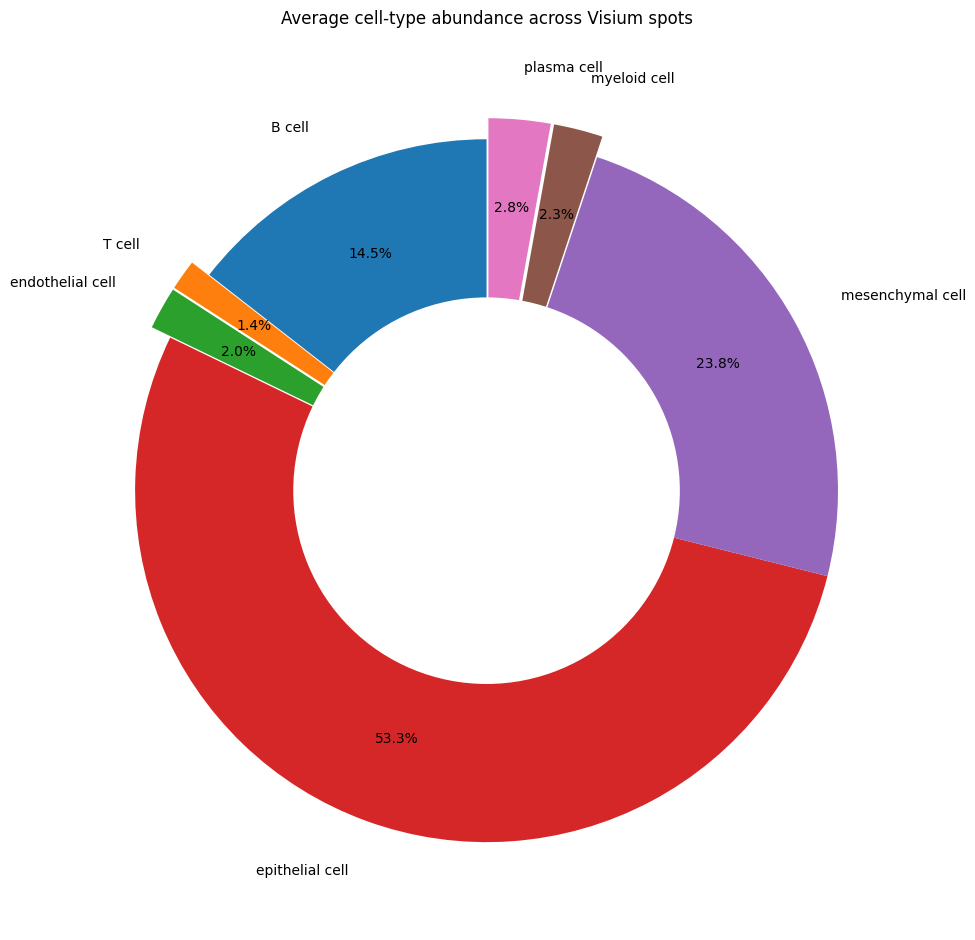

In [21]:
# 1 average + keep “Unknown” (or drop if you prefer)
avg = C_est_test.mean(axis=1)            # mean across Visium spots
avg = avg[avg > 0]                  # drop types that are literally all-zero

labels   = avg.index.tolist()
values   = avg.values
fractions = values / values.sum()

# 2 helper to format % text only if ≥ 1 %
def autopct_fmt(pct):
    return f"{pct:.1f}%" if pct >= 1 else ""


# 3 explode tiny classes a bit so they are visible

explode = np.where(fractions < 0.03, 0.06, 0.0)   # bump slices <3 %

# 4 plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(
    values,
    labels=labels,
    explode=explode,
    autopct=autopct_fmt,
    startangle=90,
    pctdistance=0.75,      # move % text inward a touch
    labeldistance=1.15      # push labels outward
)

# make it a doughnut
ax.add_artist(plt.Circle((0, 0), 0.55, fc="white"))

plt.title("Average cell-type abundance across Visium spots", pad=20)
plt.tight_layout()
plt.show()


In [22]:
A = sc.read_h5ad("../Data/STDS0000002/adata_processed.h5ad")

/Users/bilalkachir/Desktop/Internship/.venv/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [23]:
C_hat = C_est_test

In [24]:
# STEP 1: Show basic shapes
print(" A.shape (Visium AnnData):", A.shape)
print(" C_hat.shape (cell-type composition):", C_hat.shape)

# STEP 2: Show barcode format for each
print("\n First 5 barcodes in A.obs_names:")
print(A.obs_names[:5].tolist())

print("\n First 5 barcodes in C_hat.columns:")
print(C_hat.columns[:5].tolist())

# STEP 3: Check for common barcodes
matching_barcodes = set(A.obs_names).intersection(set(C_hat.columns))
print(f"\n Matching barcodes: {len(matching_barcodes)} / {len(C_hat.columns)}")

# If zero matches, try barcode cleaning
if len(matching_barcodes) == 0:
    print("\n No matches — attempting to clean barcode formats...")

    # Clean C_hat barcodes
    cleaned = C_hat.columns.str.replace(r"-\d+$", "", regex=True)
    print(" Example cleaned C_hat barcodes:", cleaned[:5].tolist())

    # Clean A.obs_names too (if not already cleaned)
    A.obs_names = A.obs_names.str.replace(r"-\d+$", "", regex=True)
    print(" Example cleaned A.obs_names:", A.obs_names[:5].tolist())

    # Try matching again
    C_hat.columns = cleaned
    matching_barcodes = set(A.obs_names).intersection(set(C_hat.columns))
    print(f" After cleaning, matching barcodes: {len(matching_barcodes)}")

# STEP 4: Check spatial coordinates
if "spatial" in A.obsm:
    coords = pd.DataFrame(A.obsm["spatial"], index=A.obs_names, columns=["x", "y"])
    print("\n Coordinates shape:", coords.shape)
    print(" First 3 rows of coordinates:\n", coords.head(3))
else:
    print("\n A.obsm['spatial'] not found!")

# STEP 5: Validate coordinate alignment
try:
    coords_aligned = coords.loc[C_hat.columns]
    print("\n Coordinates successfully aligned to C_hat.")
    print("Coords aligned shape:", coords_aligned.shape)
except KeyError as e:
    print("\n Failed to align coordinates with C_hat.columns. Error:")
    print(str(e))


 A.shape (Visium AnnData): (39936, 33538)
 C_hat.shape (cell-type composition): (7, 39936)

 First 5 barcodes in A.obs_names:
['AAACAACGAATAGTTC-1', 'AAACAAGTATCTCCCA-1', 'AAACAATCTACTAGCA-1', 'AAACACCAATAACTGC-1', 'AAACAGAGCGACTCCT-1']

 First 5 barcodes in C_hat.columns:
['AAACAACGAATAGTTC-1', 'AAACAAGTATCTCCCA-1', 'AAACAATCTACTAGCA-1', 'AAACACCAATAACTGC-1', 'AAACAGAGCGACTCCT-1']

 Matching barcodes: 4992 / 39936

 Coordinates shape: (39936, 2)
 First 3 rows of coordinates:
                        x     y
AAACAACGAATAGTTC-1  1694   745
AAACAAGTATCTCCCA-1  5303  4372
AAACAATCTACTAGCA-1  2824   959

 Failed to align coordinates with C_hat.columns. Error:
"['AAACAACGAATAGTTC-1-1', 'AAACAAGTATCTCCCA-1-1', 'AAACAATCTACTAGCA-1-1', 'AAACACCAATAACTGC-1-1', 'AAACAGAGCGACTCCT-1-1', 'AAACAGCTTTCAGAAG-1-1', 'AAACAGGGTCTATATT-1-1', 'AAACAGTGTTCCTGGG-1-1', 'AAACATGGTGAGAGGA-1-1', 'AAACATTTCCCGGATT-1-1', 'AAACCACTACACAGAT-1-1', 'AAACCCGAACGAAATC-1-1', 'AAACCGGAAATGTTAA-1-1', 'AAACCGGGTAGGTACC-1-1',

In [25]:
# Clean up C_hat column names to just end with '-1'
C_hat.columns = C_hat.columns.str.replace(r"-1-\d+", "-1", regex=True)

coords_aligned = coords.loc[C_hat.columns]


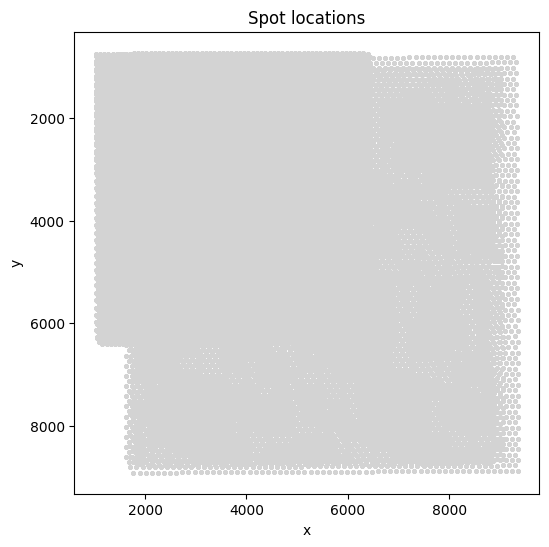

In [26]:
plt.figure(figsize=(6, 6))
plt.scatter(coords_aligned["x"], coords_aligned["y"], c="lightgray", s=5)
plt.title("Spot locations")
plt.xlabel("x")
plt.ylabel("y")
plt.gca().invert_yaxis()  # optional for Visium-like view
plt.show()

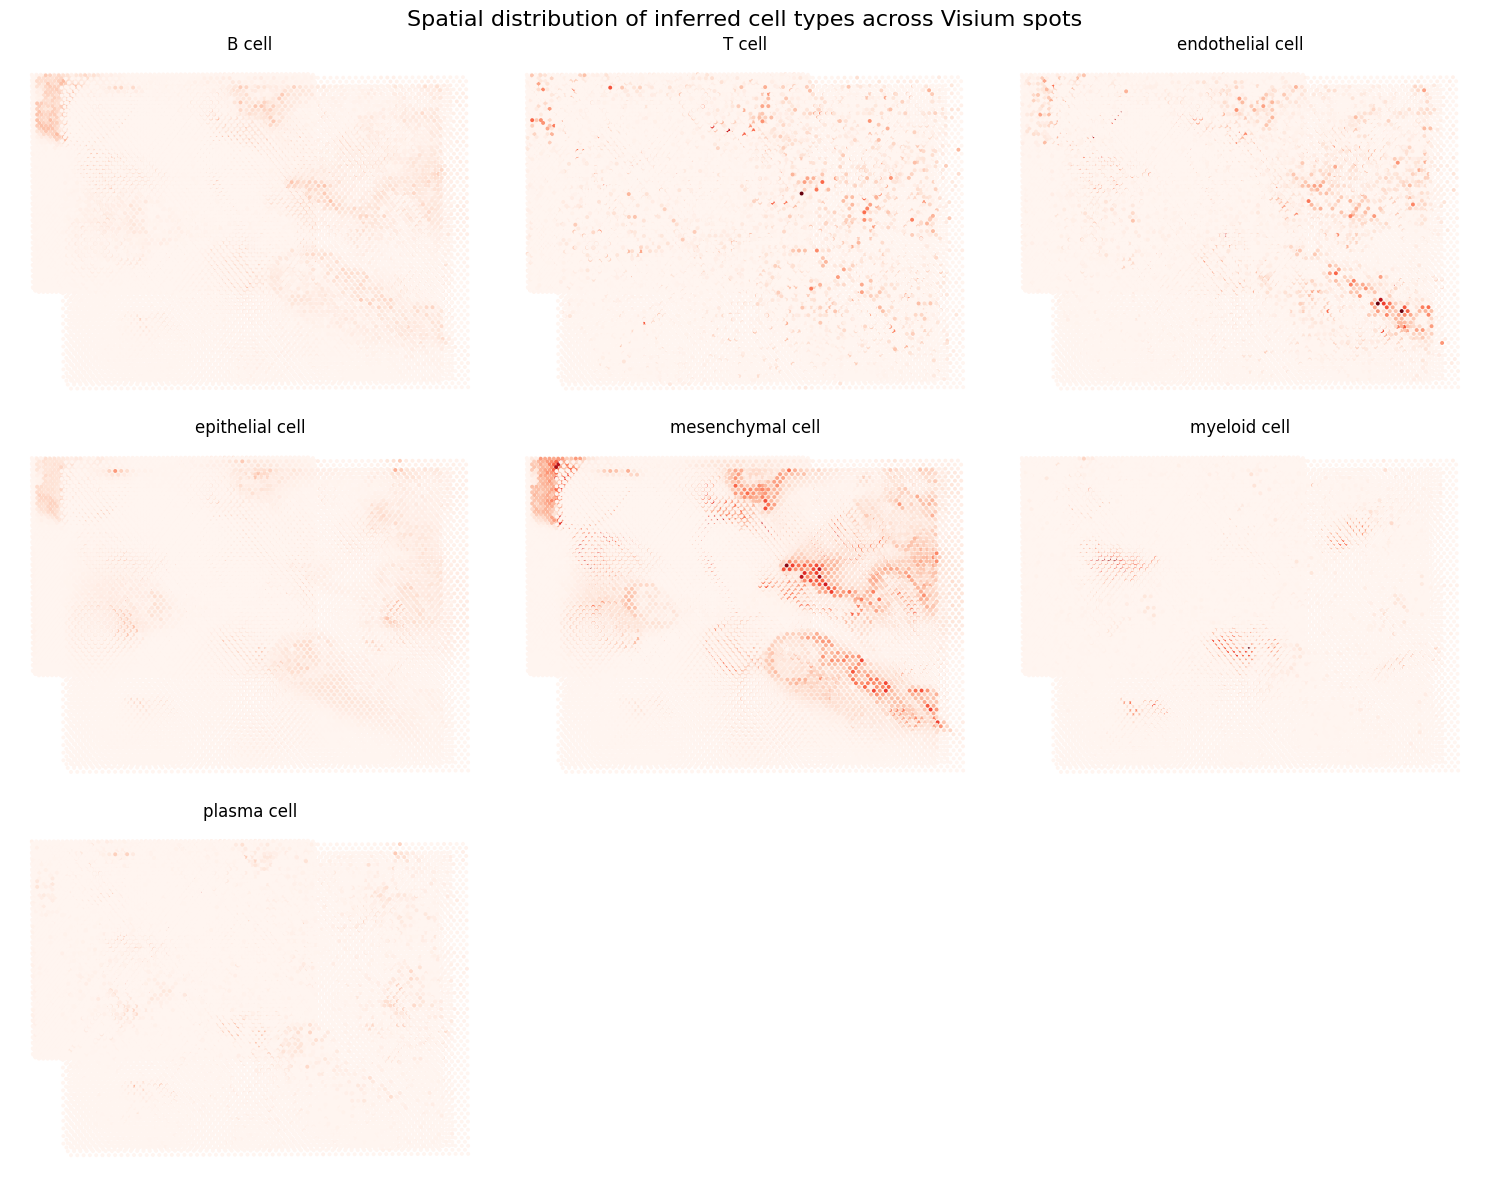

In [27]:
# Choose cell types (already in C_hat)
cell_types = C_hat.index.tolist()

# Layout config
n_ct = len(cell_types)
n_cols = 3
n_rows = (n_ct + n_cols - 1) // n_cols

# Plot
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))

for i, ct in enumerate(cell_types):
    ax = axs[i // n_cols, i % n_cols] if n_ct > 1 else axs

    ax.scatter(
        coords["x"], coords["y"],
        c=C_hat.loc[ct], cmap="Reds", s=8,
        edgecolor="none"
    )
    ax.set_title(ct)
    ax.invert_yaxis()
    ax.axis("off")

# Hide any unused subplots
for j in range(i + 1, n_rows * n_cols):
    axs[j // n_cols, j % n_cols].axis("off")

plt.suptitle("Spatial distribution of inferred cell types across Visium spots", fontsize=16)
plt.tight_layout()
plt.show()


### Gene Set Enrichment analysis

#### Using KEGG Pathways

In [28]:
gene_var_df = pd.read_csv("../Data/STDS0000002/gene_ranking_by_variance.csv")
print(gene_var_df.head())

     gene   variance
0  MT-CO2  3708.8901
1  MT-CO3  1903.8772
2  MT-CO1  1738.3859
3  EEF1A1  1356.8043
4  COL3A1  1028.5734


In [29]:
# 1. Drop any rows with missing or non-numeric scores
gene_var_df = gene_var_df.dropna(subset=["gene", "variance"])
gene_var_df["variance"] = pd.to_numeric(gene_var_df["variance"], errors="coerce")
gene_var_df = gene_var_df.dropna()

# 2. Remove duplicate genes — keep the one with highest variance
gene_var_df = gene_var_df.sort_values("variance", ascending=False).drop_duplicates("gene")

# 3. Ensure gene names are gene **symbols** (not Ensembl IDs like ENSG00000...)
# You might need to map Ensembl → gene symbols if not already done

# 4. Save the ranking file for GSEA
rnk = gene_var_df[["gene", "variance"]]
rnk.columns = ["gene_name", "score"]
rnk_path = "ranked_genes_for_gsea.rnk"
rnk.to_csv(rnk_path, sep="\t", index=False)


In [30]:
import gseapy as gp
from gseapy.plot import barplot, dotplot

In [31]:
# Run GSEA PreRanked
# Using KEGG pathways as example — you can change this to GO_Biological_Process_2021 etc.
enr = gp.prerank(
    rnk=rnk,
    gene_sets="KEGG_2021_Human", 
    processes=4,
    permutation_num=100,          # reduce for speed, increase for accuracy
    outdir="gsea_results",        # where results go
    format="png",
    seed=42
)

/var/folders/mb/b_x6s7gj5p765n_c33q22x0r0000gn/T/ipykernel_61614/3682317560.py:3: DeprecationWarning: processes is deprecated; use threads
  enr = gp.prerank(
2025-07-28 00:08:43,902 [WARNING] Duplicated values found in preranked stats: 33.08% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


In [32]:
# View results table
enr_results = enr.res2d
print(enr_results.head())


      Name                                          Term        ES       NES  \
0  prerank                       African trypanosomiasis  0.982044  1.265626   
1  prerank                             Phototransduction  0.970454  1.264778   
2  prerank              Vitamin digestion and absorption  0.980642  1.253425   
3  prerank  Intestinal immune network for IgA production  0.987829  1.248247   
4  prerank                     Graft-versus-host disease  0.958872  1.245108   

  NOM p-val FDR q-val FWER p-val Tag % Gene %               Lead_genes  
0      0.05       1.0       0.91  4/36  0.75%      APOA1;HBA2;HBA1;HBB  
1      0.03       1.0       0.92  4/28  2.05%   CALM2;CALM1;GNB1;CALM3  
2      0.04       1.0       0.99  4/23  0.86%    APOA1;RBP2;APOA4;APOB  
3      0.02       1.0       0.99  1/45  0.03%                     PIGR  
4      0.03       1.0       0.99  4/38  1.53%  HLA-A;HLA-B;HLA-C;HLA-E  


/var/folders/mb/b_x6s7gj5p765n_c33q22x0r0000gn/T/ipykernel_61614/2747191100.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


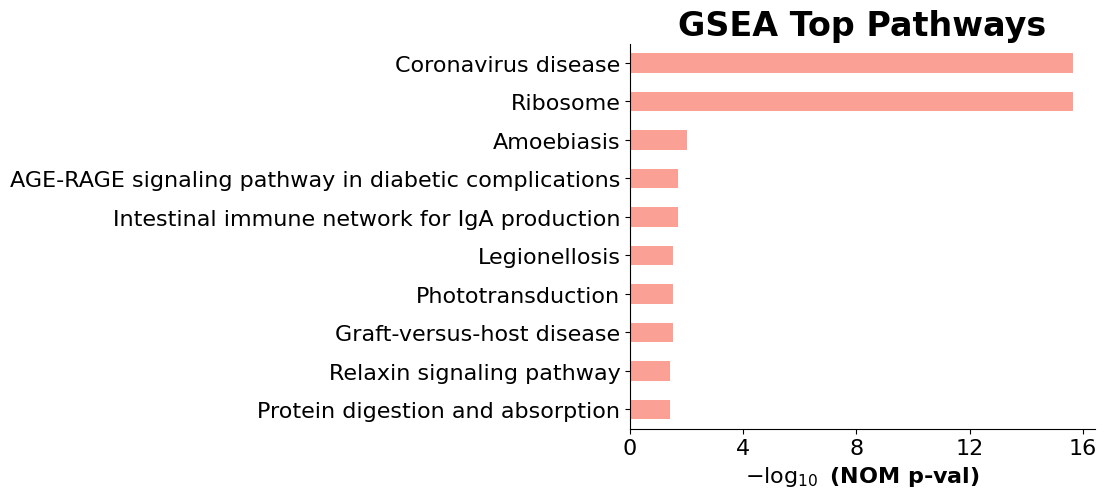

In [33]:
barplot(
    df=enr_results,
    column='NOM p-val', 
    title='GSEA Top Pathways',
    cutoff=0.05,
    top_term=10,
    figsize=(6, 5),
    ofname=None           
)
plt.tight_layout()
plt.show()


| Pathway                                          | Biological Insight                                                                                                                                                            |
| ------------------------------------------------ | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Coronavirus disease**                          | Surprisingly enriched, this may reflect general **immune activation or inflammation**, as many genes in this pathway overlap with interferon signaling and cytokine response. |
| **Ribosome**                                     | Indicates **high transcriptional and translational activity**, likely from **epithelial or proliferative cells**.                                                             |
| **Amoebiasis**                                   | Contains genes involved in **immune defense and mucosal responses**, again reflecting immune activation.                                                                      |
| **AGE-RAGE signaling in diabetic complications** | Involves **oxidative stress, inflammation**, and may reflect **chronic tissue stress or damage**.                                                                             |
| **Intestinal immune network for IgA production** | Highly relevant in gut tissue; reflects **B cell and plasma cell activity**, **mucosal immunity**.                                                                            |
| **Legionellosis**                                | Similar to Amoebiasis, this pathway includes **innate immune response genes**.                                                                                                |
| **Phototransduction**                            | Likely a **false positive** unless retinal tissue is involved. Could result from overlapping gene expression artifacts.                                                       |
| **Graft-versus-host disease**                    | Includes **MHC and antigen presentation genes** – likely active in **immune cells** in tissue.                                                                                |
| **Relaxin signaling pathway**                    | Associated with **ECM remodeling**, **angiogenesis**, and tissue response.                                                                                                    |
| **Protein digestion and absorption**             | Could reflect **enterocyte activity** or general digestive tract involvement.                                                                                                 |


Caution on NOM p-val vs. FDR
We're using nominal p-values, which are not corrected for multiple testing. So:
- They're useful for exploratory insights.
- But FDR q-values are more reliable for claims of statistical significance.

Since the FDRs were all 1.0, these results should be considered exploratory, not definitive.

#### GO BP GSEA

In [34]:
# Run GSEA PreRanked
# Using GO
enr = gp.prerank(
    rnk=rnk,
    gene_sets="GO_Biological_Process_2021",
    processes=4,
    permutation_num=2000,          # reduce for speed, increase for accuracy
    outdir="gsea_results",        # where results go
    format="png",
    seed=42
)

/var/folders/mb/b_x6s7gj5p765n_c33q22x0r0000gn/T/ipykernel_61614/162637571.py:3: DeprecationWarning: processes is deprecated; use threads
  enr = gp.prerank(
2025-07-28 00:08:49,919 [WARNING] Duplicated values found in preranked stats: 33.08% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


In [35]:
# View results table
enr_results = enr.res2d
print(enr_results.head())

      Name                                               Term        ES  \
0  prerank  negative regulation of immune system process (...  0.999198   
1  prerank                heme catabolic process (GO:0042167)  0.988904   
2  prerank  porphyrin-containing compound catabolic proces...  0.988904   
3  prerank  protein localization to cell-cell junction (GO...  0.988197   
4  prerank      epithelial structure maintenance (GO:0010669)  0.989236   

        NES NOM p-val FDR q-val FWER p-val Tag % Gene %            Lead_genes  
0  1.295021       0.0       1.0     0.9485  1/19  0.01%                COL3A1  
1  1.288763    0.0385       1.0        1.0  2/16  0.69%           FABP1;GSTA1  
2  1.288763    0.0385       1.0        1.0  2/16  0.69%           FABP1;GSTA1  
3  1.286495    0.0285       1.0        1.0  2/15  0.10%            ACTG1;ACTB  
4  1.286164    0.0335       1.0        1.0  4/17  0.66%  TFF3;MUC2;MUC13;TFF1  


/var/folders/mb/b_x6s7gj5p765n_c33q22x0r0000gn/T/ipykernel_61614/413791965.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


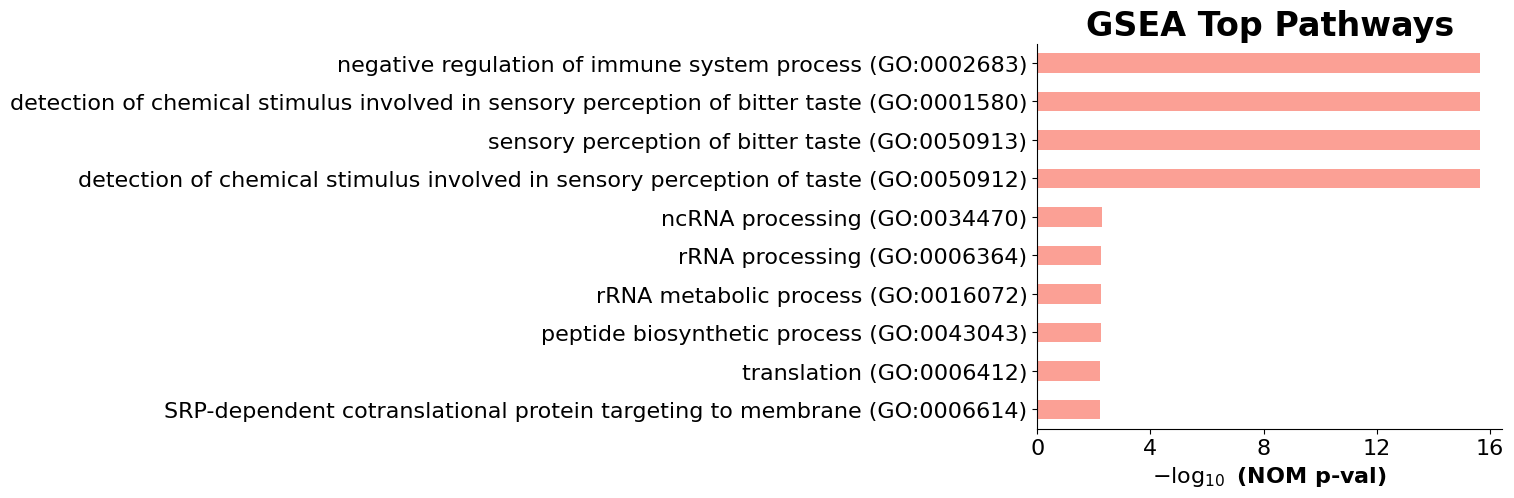

In [36]:
barplot(
    df=enr_results,
    column='NOM p-val', 
    title='GSEA Top Pathways',
    cutoff=0.05,
    top_term=10,
    figsize=(6, 5),
    ofname=None           
)
plt.tight_layout()
plt.show()

In [37]:
A = sc.read_h5ad("../Data/STDS0000002/adata_processed.h5ad")

/Users/bilalkachir/Desktop/Internship/.venv/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [38]:
# Use spatial coordinates
A.obsm["X_spatial"] = A.obsm["spatial"]

# Compute neighbors based on spatial positions
sc.pp.neighbors(A, use_rep="X_spatial", n_neighbors=10)

# Perform Leiden clustering
sc.tl.leiden(A, key_added="region", resolution=0.4)

# Check region assignments
print(A.obs["region"].value_counts())



/var/folders/mb/b_x6s7gj5p765n_c33q22x0r0000gn/T/ipykernel_61614/4282264269.py:8: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(A, key_added="region", resolution=0.4)


region
0     1549
1     1513
2     1507
3     1458
4     1433
5     1402
6     1121
7     1046
8     1023
9      992
10     979
11     969
12     954
13     948
14     912
15     900
16     892
17     831
18     812
19     784
20     776
21     765
22     729
23     709
24     697
25     694
26     666
27     652
28     650
29     646
30     644
31     605
32     597
33     579
34     561
35     561
36     561
37     547
38     533
39     503
40     495
41     472
42     469
43     469
44     466
45     442
46     437
47     433
48     425
49     421
50     410
51     297
Name: count, dtype: int64


In [39]:
def generate_logfc_ranking(adata, group_key='region', group1='0', group2='1', pseudocount=1e-5):
    """
    Generate a .rnk file for GSEA using log2 fold-change between two groups of spots.

    Parameters:
    - adata: AnnData object (e.g., your Visium data)
    - group_key: str, key in adata.obs containing cluster/region labels (e.g. 'region')
    - group1: str or int, label for group 1
    - group2: str or int, label for group 2
    - pseudocount: float, small value to avoid division by zero

    Returns:
    - rnk: pd.DataFrame with columns ['gene_name', 'score'], sorted by score
    """

    # Create boolean masks for each group
    mask1 = adata.obs[group_key] == str(group1)
    mask2 = adata.obs[group_key] == str(group2)

    # Get expression matrices for each group
    X1 = adata[mask1].X
    X2 = adata[mask2].X

    # Convert to dense if needed
    if hasattr(X1, "toarray"):
        X1 = X1.toarray()
    if hasattr(X2, "toarray"):
        X2 = X2.toarray()

    # Calculate mean expression
    mean1 = X1.mean(axis=0)
    mean2 = X2.mean(axis=0)

    # Log2 fold-change
    logfc = np.log2((mean1 + pseudocount) / (mean2 + pseudocount))

    # Create ranked gene list
    rnk = pd.DataFrame({
        "gene_name": adata.var_names,
        "score": logfc
    }).sort_values("score", ascending=False)

    return rnk

In [40]:
rnk = generate_logfc_ranking(A, group_key='region', group1='0', group2='1')
rnk.to_csv("logfc_ranked_genes.rnk", sep="\t", index=False, header=False)

In [41]:
enr = gp.prerank(
    rnk="logfc_ranked_genes.rnk",
    gene_sets="KEGG_2021_Human",
    permutation_num=100,
    threads=4,
    outdir="gsea_output",
    format="png",
    seed=42
)

2025-07-28 00:23:00,956 [WARNING] Duplicated values found in preranked stats: 72.05% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


In [42]:
# View results table
enr_results = enr.res2d
print(enr_results.head())

      Name                       Term        ES       NES NOM p-val FDR q-val  \
0  prerank         Nicotine addiction  0.600342  1.302085      0.01       1.0   
1  prerank                 Proteasome  0.550652  1.217636      0.07       1.0   
2  prerank  mRNA surveillance pathway  0.507497  1.185544      0.02       1.0   
3  prerank   Phenylalanine metabolism  0.590981  1.182939  0.135417       1.0   
4  prerank            RNA degradation  0.501565  1.176844      0.05       1.0   

  FWER p-val  Tag %  Gene %                                         Lead_genes  
0       0.91  17/40  23.67%  GRIN3B;GABRQ;GABRG2;GRIN2C;SLC17A7;GABRR1;GABR...  
1        1.0  41/46  41.44%  PSMA6;PSMD6;PSMD11;PSMA5;SEM1;PSMD4;POMP;PSMC1...  
2        1.0  87/98  48.37%  PABPC3;PABPN1L;NXF3;CSTF2;MAGOHB;UPF3B;GSPT2;M...  
3        1.0   5/17   5.90%                   IL4I1;ALDH3A1;GOT1L1;TAT;ALDH3B2  
4        1.0  72/79  46.15%  PABPC3;PNLDC1;PFKP;DCPS;EXOSC2;MTREX;BTG2;EDC3...  


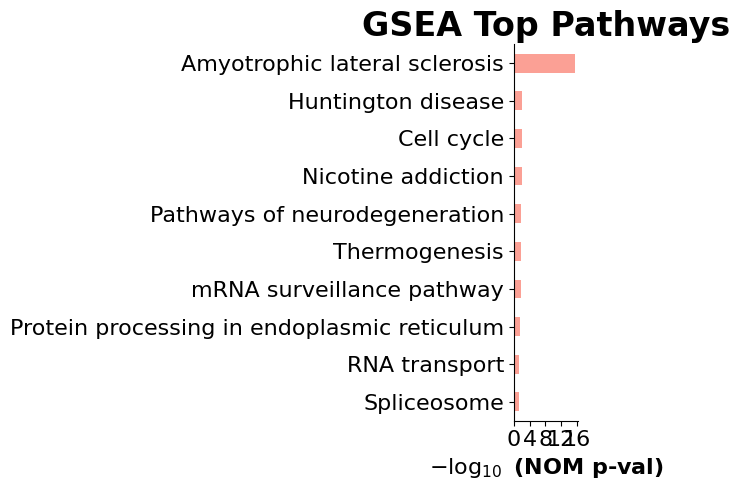

In [43]:
barplot(
    df=enr_results,
    column='NOM p-val', 
    title='GSEA Top Pathways',
    cutoff=0.05,
    top_term=10,
    figsize=(6, 5),
    ofname=None           
)
plt.tight_layout()
plt.show()

<Axes: xlabel='score', ylabel='Count'>

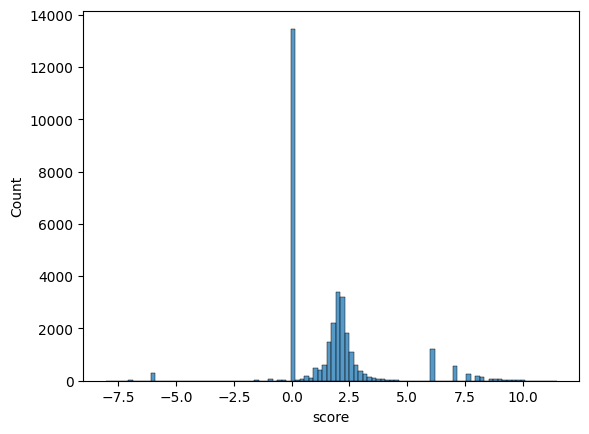

In [44]:
import seaborn as sns
sns.histplot(rnk['score'], bins=100)

In [45]:
# Filter genes with low variance between groups
diff_mask = (rnk['score'].abs() > 1)  # keep genes with meaningful change
rnk_filtered = rnk[diff_mask].copy()
rnk_filtered.to_csv("logfc_filtered.rnk", sep="\t", index=False, header=False)

In [46]:
enr = gp.prerank(
    rnk="logfc_filtered.rnk",
    gene_sets="KEGG_2021_Human",
    permutation_num=100,
    threads=4,
    outdir="gsea_output",
    format="png",
    seed=42
)

2025-07-28 00:23:11,961 [WARNING] Duplicated values found in preranked stats: 52.30% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


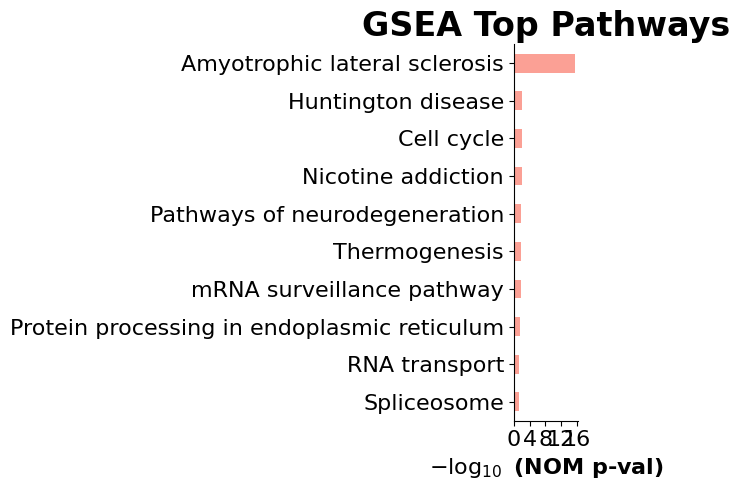

In [47]:
barplot(
    df=enr_results,
    column='NOM p-val', 
    title='GSEA Top Pathways',
    cutoff=0.05,
    top_term=10,
    figsize=(6, 5),
    ofname=None           
)
plt.tight_layout()
plt.show()

In [48]:
# Let's try using median instead of mean
def generate_logfc_ranking_median(adata, group_key='region', group1='0', group2='1', pseudocount=1e-5):
    mask1 = adata.obs[group_key] == str(group1)
    mask2 = adata.obs[group_key] == str(group2)

    X1 = adata[mask1].X
    X2 = adata[mask2].X

    if hasattr(X1, "toarray"):
        X1 = X1.toarray()
    if hasattr(X2, "toarray"):
        X2 = X2.toarray()

    med1 = np.median(X1, axis=0)
    med2 = np.median(X2, axis=0)

    logfc = np.log2((med1 + pseudocount) / (med2 + pseudocount))

    rnk = pd.DataFrame({"gene_name": adata.var_names, "score": logfc})
    rnk = rnk.sort_values("score", ascending=False)
    return rnk


In [49]:
rnk = generate_logfc_ranking_median(A, group_key='region', group1='0', group2='1')
rnk.to_csv("logfc_ranked_genes.rnk", sep="\t", index=False, header=False)

In [50]:
enr = gp.prerank(
    rnk="logfc_ranked_genes.rnk",
    gene_sets="KEGG_2021_Human",
    permutation_num=100,
    threads=4,
    outdir="gsea_output",
    format="png",
    seed=42
)

2025-07-28 00:23:30,045 [WARNING] Duplicated values found in preranked stats: 99.94% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


## All i understood is that the data being used is bad and not statistically significant